# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       7168      
                                                                 
 activation (Activation)     (None, 98, 98, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       295040    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                   

Found 1398 images belonging to 7 classes.
Found 338 images belonging to 7 classes.


<ipython-input-2-cebe032fd3aa>:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/35
43/43 [==============================] - 666s 15s/step - loss: 2.1447 - accuracy: 0.2101 - val_loss: 1.9017 - val_accuracy: 0.2250
Epoch 2/35
43/43 [==============================] - 11s 248ms/step - loss: 1.8369 - accuracy: 0.2818 - val_loss: 1.6187 - val_accuracy: 0.4375
Epoch 3/35
43/43 [==============================] - 10s 243ms/step - loss: 1.5033 - accuracy: 0.4341 - val_loss: 1.3367 - val_accuracy: 0.5125
Epoch 4/35
43/43 [==============================] - 10s 224ms/step - loss: 1.3177 - accuracy: 0.5161 - val_loss: 1.2487 - val_accuracy: 0.5469
Epoch 5/35
43/43 [==============================] - 10s 223ms/step - loss: 1.1927 - accuracy: 0.5608 - val_loss: 1.0320 - val_accuracy: 0.6281
Epoch 6/35
43/43 [==============================] - 11s 245ms/step - loss: 1.0928 - accuracy: 0.5915 - val_loss: 0.9858 - val_accuracy: 0.6344
Epoch 7/35
43/43 [==============================] - 11s 245ms/step - loss: 0.9530 - accuracy: 0.6493 - val_loss: 0.7801 - val_accuracy: 0.7500


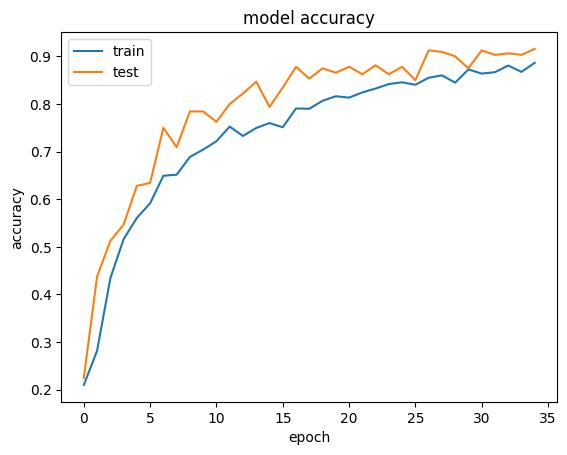

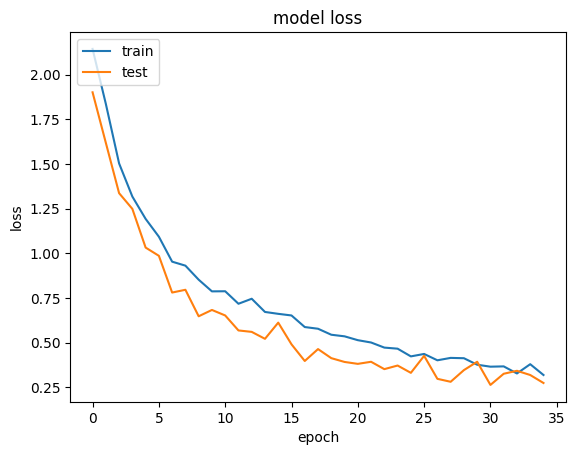

1149.9644258022308


In [ ]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from matplotlib import pyplot as plt
import time
import tensorflow as tf

start = time.time()
img_width, img_height = 100, 100

train_data_dir = '/content/drive/MyDrive/CK dataset/train'
validation_data_dir = '/content/drive/MyDrive/CK dataset/val'
nb_train_samples = 1405
nb_validation_samples = 345
epochs =35
batch_size = 32

input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss ='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=1e-5), metrics =['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

Val_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size =(img_width, img_height),
                                                    batch_size = batch_size, class_mode ='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size =(img_width, img_height),
                                                        batch_size = batch_size, class_mode ='categorical', shuffle=False)

history = model.fit_generator(train_generator,
        steps_per_epoch = nb_train_samples // batch_size,
        epochs = epochs, validation_data = validation_generator,
        validation_steps = nb_validation_samples // batch_size)

model.save_weights('model_saved.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)

Download Models

In [ ]:
from google.colab import files
files.download("model_saved.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-4-834779160313>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[23  5  0  0  1  1  0]
 [ 0 34  1  0  1  0  0]
 [ 0  0 35  0  4  0  0]
 [ 0  0  1 51  0  0  0]
 [ 3  0  0  0 68  1  0]
 [ 2  1  1  0  2 54  0]
 [ 1  0  1  0  2  0 45]]
Classification Report
              precision    recall  f1-score   support

       Anger       0.79      0.77      0.78        30
     Disgust       0.85      0.94      0.89        36
        Fear       0.90      0.90      0.90        39
       Happy       1.00      0.98      0.99        52
     Neutral       0.87      0.94      0.91        72
         Sad       0.96      0.90      0.93        60
    Surprise       1.00      0.92      0.96        49

    accuracy                           0.92       338
   macro avg       0.91      0.91      0.91       338
weighted avg       0.92      0.92      0.92       338



Confusion Matrix

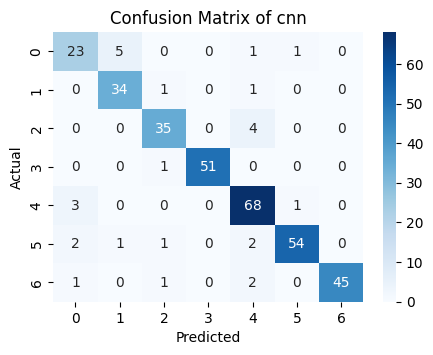

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of cnn')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_cnn.png')

# Show the plot
plt.show()

#vgg19

starting
Found 1398 images belonging to 7 classes.
Found 338 images belonging to 7 classes.


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

<ipython-input-11-036b12e0e4d9>:83: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs=epochs, steps_per_epoch=train_gen.n // 32 + 1, callbacks=[checkpointer],


Epoch 1/25
44/44 [==============================] - ETA: 0s - loss: 5.6784 - acc: 0.3391
Epoch 1: saving model to model_vgg_19.hdf5
44/44 [==============================] - 14s 276ms/step - loss: 5.6784 - acc: 0.3391 - val_loss: 1.5348 - val_acc: 0.3906
Epoch 2/25
44/44 [==============================] - ETA: 0s - loss: 1.2096 - acc: 0.5837
Epoch 2: saving model to model_vgg_19.hdf5
44/44 [==============================] - 8s 180ms/step - loss: 1.2096 - acc: 0.5837 - val_loss: 1.1744 - val_acc: 0.6469
Epoch 3/25
44/44 [==============================] - ETA: 0s - loss: 0.9439 - acc: 0.6817
Epoch 3: saving model to model_vgg_19.hdf5
44/44 [==============================] - 9s 210ms/step - loss: 0.9439 - acc: 0.6817 - val_loss: 1.0344 - val_acc: 0.6219
Epoch 4/25
44/44 [==============================] - ETA: 0s - loss: 0.6278 - acc: 0.7804
Epoch 4: saving model to model_vgg_19.hdf5
44/44 [==============================] - 9s 203ms/step - loss: 0.6278 - acc: 0.7804 - val_loss: 1.6078 - val

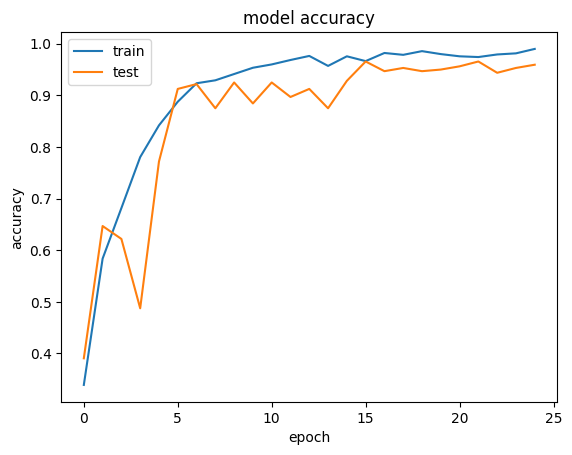

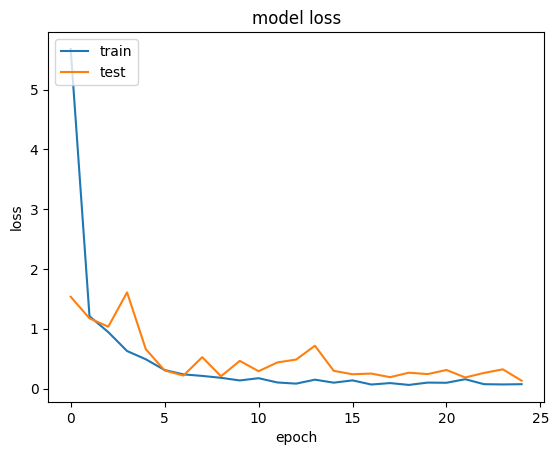

269.9072871208191


In [ ]:
print("starting")
import time
import random
import keras
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, InputLayer
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
import json

if __name__ == '__main__':
    start = time.time()
#    random.seed(8675309)
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen =ImageDataGenerator(rescale=1./255)

#dataset loading
    train_gen = train_datagen.flow_from_directory(
            "/content/drive/MyDrive/CK dataset/train/",
            target_size=(200,200),
            color_mode='rgb',
            batch_size=32,
            classes=['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise'],
            class_mode='categorical'
        )

    val_gen = val_datagen.flow_from_directory(
            "/content/drive/MyDrive/CK dataset/val/",
            target_size=(200,200),
            color_mode='rgb',
            batch_size=32,
            classes=['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise'],
            class_mode='categorical',
            shuffle=False

        )

    # pre-process the data for Keras
    vgg_model = tf.keras.applications.VGG19(weights='imagenet',
                               include_top=False,
                               input_shape=(200, 200, 3))
    layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

    # Getting output tensor of the last VGG layer that we want to include
    x = layer_dict['block2_pool'].output

    # Stacking a new simple convolutional network on top of it
    x = Conv2D(filters=256, kernel_size=(2, 2), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=128, kernel_size=(2, 2), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(7, activation='softmax')(x)

    model = Model(vgg_model.input, x)
    for layer in model.layers[:5]:
        layer.trainable = False

    # from keras import optimizers
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),
                  metrics=['acc'])
    model.summary()

    jsonmodel=model.to_json()
    with open('detect_vgg_19.json','w') as fp:
        json.dump(jsonmodel,fp)

    epochs = 25
    checkpointer = ModelCheckpoint(filepath='model_vgg_19.hdf5',
                                   verbose=1)
    history = model.fit_generator(train_gen, epochs=epochs, steps_per_epoch=train_gen.n // 32 + 1, callbacks=[checkpointer],
                                  verbose=1, validation_data=val_gen, validation_steps=val_gen.n // 32)
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('accuracy')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss')
    plt.show()
    end = time.time()
    print(end - start)


Download model

In [ ]:
from google.colab import files
files.download("detect_vgg_19.json")
files.download("model_vgg_19.hdf5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_gen.classes, y_pred))
print('Classification Report')
target_names = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise']
print(classification_report(val_gen.classes, y_pred, target_names=target_names))

<ipython-input-13-5d28de4dcf3a>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(val_gen)


Confusion Matrix
[[26  3  0  0  1  0  0]
 [ 0 36  0  0  0  0  0]
 [ 0  0 37  0  2  0  0]
 [ 0  2  0 50  0  0  0]
 [ 1  0  3  0 68  0  0]
 [ 0  0  0  0  0 60  0]
 [ 0  0  0  0  1  0 48]]
Classification Report
              precision    recall  f1-score   support

       Anger       0.96      0.87      0.91        30
     Disgust       0.88      1.00      0.94        36
        Fear       0.93      0.95      0.94        39
       Happy       1.00      0.96      0.98        52
     Neutral       0.94      0.94      0.94        72
         Sad       1.00      1.00      1.00        60
    Surprise       1.00      0.98      0.99        49

    accuracy                           0.96       338
   macro avg       0.96      0.96      0.96       338
weighted avg       0.96      0.96      0.96       338



Confusion Matrix

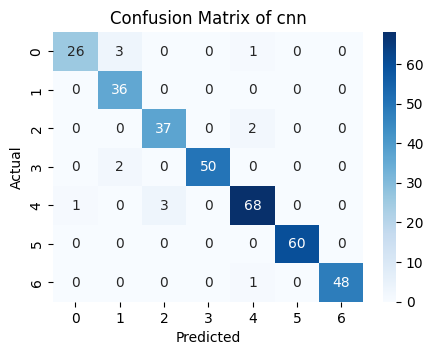

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(val_gen.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of cnn')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_cnn.png')

# Show the plot
plt.show()

#vgg16

starting
Found 1398 images belonging to 7 classes.
Found 338 images belonging to 7 classes.


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

<ipython-input-15-b93a77bdc6aa>:83: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs=epochs, steps_per_epoch=train_gen.n // 32 + 1, callbacks=[checkpointer],


Epoch 1/25
44/44 [==============================] - ETA: 0s - loss: 10.7650 - acc: 0.2918
Epoch 1: saving model to model_vgg_16.hdf5
44/44 [==============================] - 11s 221ms/step - loss: 10.7650 - acc: 0.2918 - val_loss: 1.4608 - val_acc: 0.4906
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/44 [==============================] - ETA: 0s - loss: 1.4414 - acc: 0.5365
Epoch 2: saving model to model_vgg_16.hdf5
44/44 [==============================] - 9s 197ms/step - loss: 1.4414 - acc: 0.5365 - val_loss: 0.9562 - val_acc: 0.7312
Epoch 3/25
44/44 [==============================] - ETA: 0s - loss: 0.8368 - acc: 0.7182
Epoch 3: saving model to model_vgg_16.hdf5
44/44 [==============================] - 8s 171ms/step - loss: 0.8368 - acc: 0.7182 - val_loss: 0.9111 - val_acc: 0.7000
Epoch 4/25
44/44 [==============================] - ETA: 0s - loss: 0.8223 - acc: 0.7611
Epoch 4: saving model to model_vgg_16.hdf5
44/44 [==============================] - 8s 188ms/step - loss: 0.8223 - acc: 0.7611 - val_loss: 1.0715 - val_acc: 0.6906
Epoch 5/25
44/44 [==============================] - ETA: 0s - loss: 0.4416 - acc: 0.8555
Epoch 5: saving model to model_vgg_16.hdf5
44/44 [==============================] - 9s 198ms/step - loss: 0.4416 - acc: 0.8555 - val_loss: 0.4920 - val_acc: 0.8469

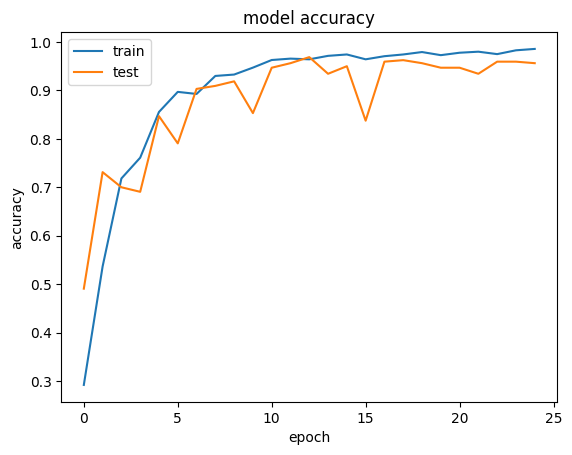

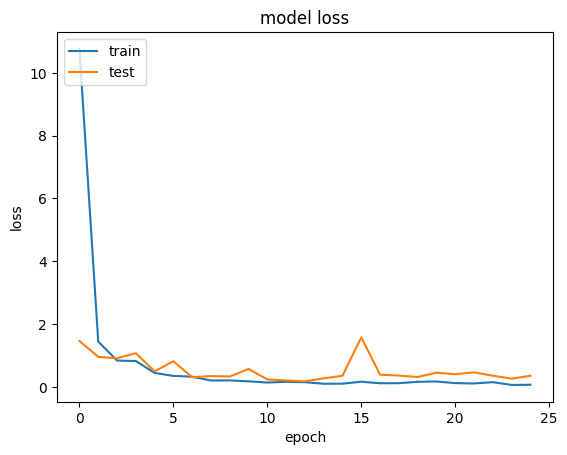

233.45043063163757


In [ ]:
print("starting")
import time
import random
import keras
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, InputLayer
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import json

if __name__ == '__main__':
    start = time.time()
#    random.seed(8675309)
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen =ImageDataGenerator(rescale=1./255)

#dataset loading
    train_gen = train_datagen.flow_from_directory(
            "/content/drive/MyDrive/CK dataset/train/",
            target_size=(200,200),
            color_mode='rgb',
            batch_size=32,
            classes=['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise'],
            class_mode='categorical'
        )

    val_gen = val_datagen.flow_from_directory(
            "/content/drive/MyDrive/CK dataset/val/",
            target_size=(200,200),
            color_mode='rgb',
            batch_size=32,
            classes=['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise'],
            class_mode='categorical',
            shuffle=False

        )

    # pre-process the data for Keras
    vgg_model = tf.keras.applications.VGG16(weights='imagenet',
                               include_top=False,
                               input_shape=(200, 200, 3))
    layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

    # Getting output tensor of the last VGG layer that we want to include
    x = layer_dict['block2_pool'].output

    # Stacking a new simple convolutional network on top of it
    x = Conv2D(filters=256, kernel_size=(2, 2), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=128, kernel_size=(2, 2), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(7, activation='softmax')(x)

    model = Model(vgg_model.input, x)
    for layer in model.layers[:5]:
        layer.trainable = False

    # from keras import optimizers
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),
                  metrics=['acc'])
    model.summary()

    jsonmodel=model.to_json()
    with open('detect_vgg_16.json','w') as fp:
        json.dump(jsonmodel,fp)

    epochs = 25
    checkpointer = ModelCheckpoint(filepath='model_vgg_16.hdf5',
                                   verbose=1)
    history = model.fit_generator(train_gen, epochs=epochs, steps_per_epoch=train_gen.n // 32 + 1, callbacks=[checkpointer],
                                  verbose=1, validation_data=val_gen, validation_steps=val_gen.n // 32)
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('accuracy')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss')
    plt.show()
    end = time.time()
    print(end - start)


In [ ]:
from google.colab import files
files.download("detect_vgg_16.json")
files.download("model_vgg_16.hdf5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_gen.classes, y_pred))
print('Classification Report')
target_names = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise']
print(classification_report(val_gen.classes, y_pred, target_names=target_names))

<ipython-input-17-5d28de4dcf3a>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(val_gen)


Confusion Matrix
[[26  2  0  1  1  0  0]
 [ 0 36  0  0  0  0  0]
 [ 0  0 39  0  0  0  0]
 [ 0  0  0 52  0  0  0]
 [ 0  3  0  0 69  0  0]
 [ 1  0  0  0  3 56  0]
 [ 0  0  1  0  2  0 46]]
Classification Report
              precision    recall  f1-score   support

       Anger       0.96      0.87      0.91        30
     Disgust       0.88      1.00      0.94        36
        Fear       0.97      1.00      0.99        39
       Happy       0.98      1.00      0.99        52
     Neutral       0.92      0.96      0.94        72
         Sad       1.00      0.93      0.97        60
    Surprise       1.00      0.94      0.97        49

    accuracy                           0.96       338
   macro avg       0.96      0.96      0.96       338
weighted avg       0.96      0.96      0.96       338



Confusion Matrix

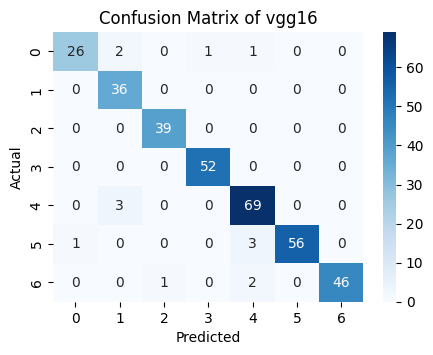

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(val_gen.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of vgg16')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_vgg16.png')

# Show the plot
plt.show()